# Support Vector Machine to Predict Gender by Voice
## **author**: Muhammad Shafa Praramadhana

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm uses to solve both classification and regression tasks, but generally, SVM works best with classification. In this kernel, i will demonstrate the use of SVM classification to predict gender by voice.

## Support Vector Machine Intuition

Technically, the primary objective of the SVM algorithm is to identify a hyperplane that distinguishably segregates the data points of different classes. The hyperplane is localized in such a manner that the largest margin separates the classes under consideration. But dont get confused between SVM and logistic regression. Both the algorithm try to find the best hyperplane, but the main difference is logistic regression is a probabilistic approach, whereas support vector machine is based on statistical approaches.

**Support Vector**
These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

**Margin**
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

### Margin in SVM

![Margin in SVM](https://static.wixstatic.com/media/8f929f_7ecacdcf69d2450087cb4a898ef90837~mv2.png)


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


The following diagram illustrates the concept of **maximum margin** and **maximum margin hyperplane** in a clear manner.


### Maximum margin hyperplane

![Maximum margin hyperplane](https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg)



# **Kernel trick** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems

We can define a kernel function as follows-


### Kernel function

![Kernel function](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTodZptqcRor0LGo8Qn7_kJB9n9BACMt6jgIPZ4C3g_rgh_uSRZLQ&s)

In the context of SVMs, there are 4 popular kernels – `Linear kernel`,`Polynomial kernel`,`Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. These are described below -

## **Linear kernel**

In linear kernel, the kernel function takes the form of a linear function as follows-

**linear kernel : K(xi , xj ) = xiT xj**

Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time.

Linear kernel can be visualized with the following figure.

### Linear Kernel

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

## **Polynomial Kernel**

Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples.

For degree-d polynomials, the polynomial kernel is defined as follows –

**Polynomial kernel : K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. It can be visualized with the following diagram.

### Polynomial Kernel

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

## **Radial Basis Function Kernel**

Radial basis function kernel is a general purpose kernel. It is used when we have no prior knowledge about the data. The RBF kernel on two samples x and y is defined by the following equation –


### Radial Basis Function kernel

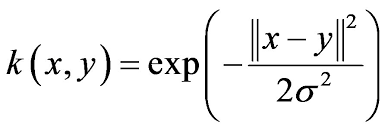

The following diagram demonstrates the SVM classification with rbf kernel.

### SVM Classification with rbf kernel

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

## **Sigmoid kernel**

Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. Sigmoid kernel is given by the following equation –

**sigmoid kernel : k (x, y) = tanh(αxTy + c)**

Sigmoid kernel can be visualized with the following diagram-

### Sigmoid kernel

![Sigmoid kernel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKeXbOIlniBXYwMYlEYLKPwZZg8vFU1wVm3RWMACjVcT4iBVDy&s)

## Dataset Description

### The following acoustic properties of each voice are measured and included within the dataset:
* **meanfreq**: mean frequency (in kHz)
* **sd**: standard deviation of frequency
* **median**: median frequency (in kHz)
* **Q25**: first quantile (in kHz)
* **Q75**: third quantile (in kHz)
* **IQR**: interquantile range (in kHz)
* **skew**: skewness (see note in specprop description)
* **kurt**: kurtosis (see note in specprop description)
* **sp.ent**: spectral entropy
* **sfm**: spectral flatness
* **mode**: mode frequency
* **centroid**: frequency centroid (see specprop)
* **peakf**: peak frequency (frequency with highest energy)
* **meanfun**: average of fundamental frequency measured across acoustic signal
* **minfun**: minimum fundamental frequency measured across acoustic signal
* **maxfun**: maximum fundamental frequency measured across acoustic signal
* **meandom**: average of dominant frequency measured across acoustic signal
* **mindom**: minimum of dominant frequency measured across acoustic signal
* **maxdom**: maximum of dominant frequency measured across acoustic signal
* **dfrange**: range of dominant frequency measured across acoustic signal
* **modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* **label**: male or female

# Step-by-step SVM Classification

## 1. Import Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/voicegender/voice.csv


## 2. Import Dataset

In [3]:
df = pd.read_csv('/kaggle/input/voicegender/voice.csv')


## 3. Exploratory Data Analysis

In [4]:
df.shape

(3168, 21)

We can see that there are 3168 instances and 21 variables in the dataset

In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


We can see that there are 20 variables in the dataset. 19 are features and 1 is the dependent variable.

Explore missing values in the dataset

In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

We can see that there are no missing values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Summary in the dataset

* There are 20 variables in the dataset.
* 19 of them are features.
* There are no missing values in the dataset.

**Outliers in numerical variables**

In [9]:
round(df.describe(), 2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,0.17,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,0.08,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,0.00,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,0.12,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,0.19,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,0.22,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,0.28,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93


### Draw boxplot to visualize outliers

Text(0, 0.5, 'modulation index')

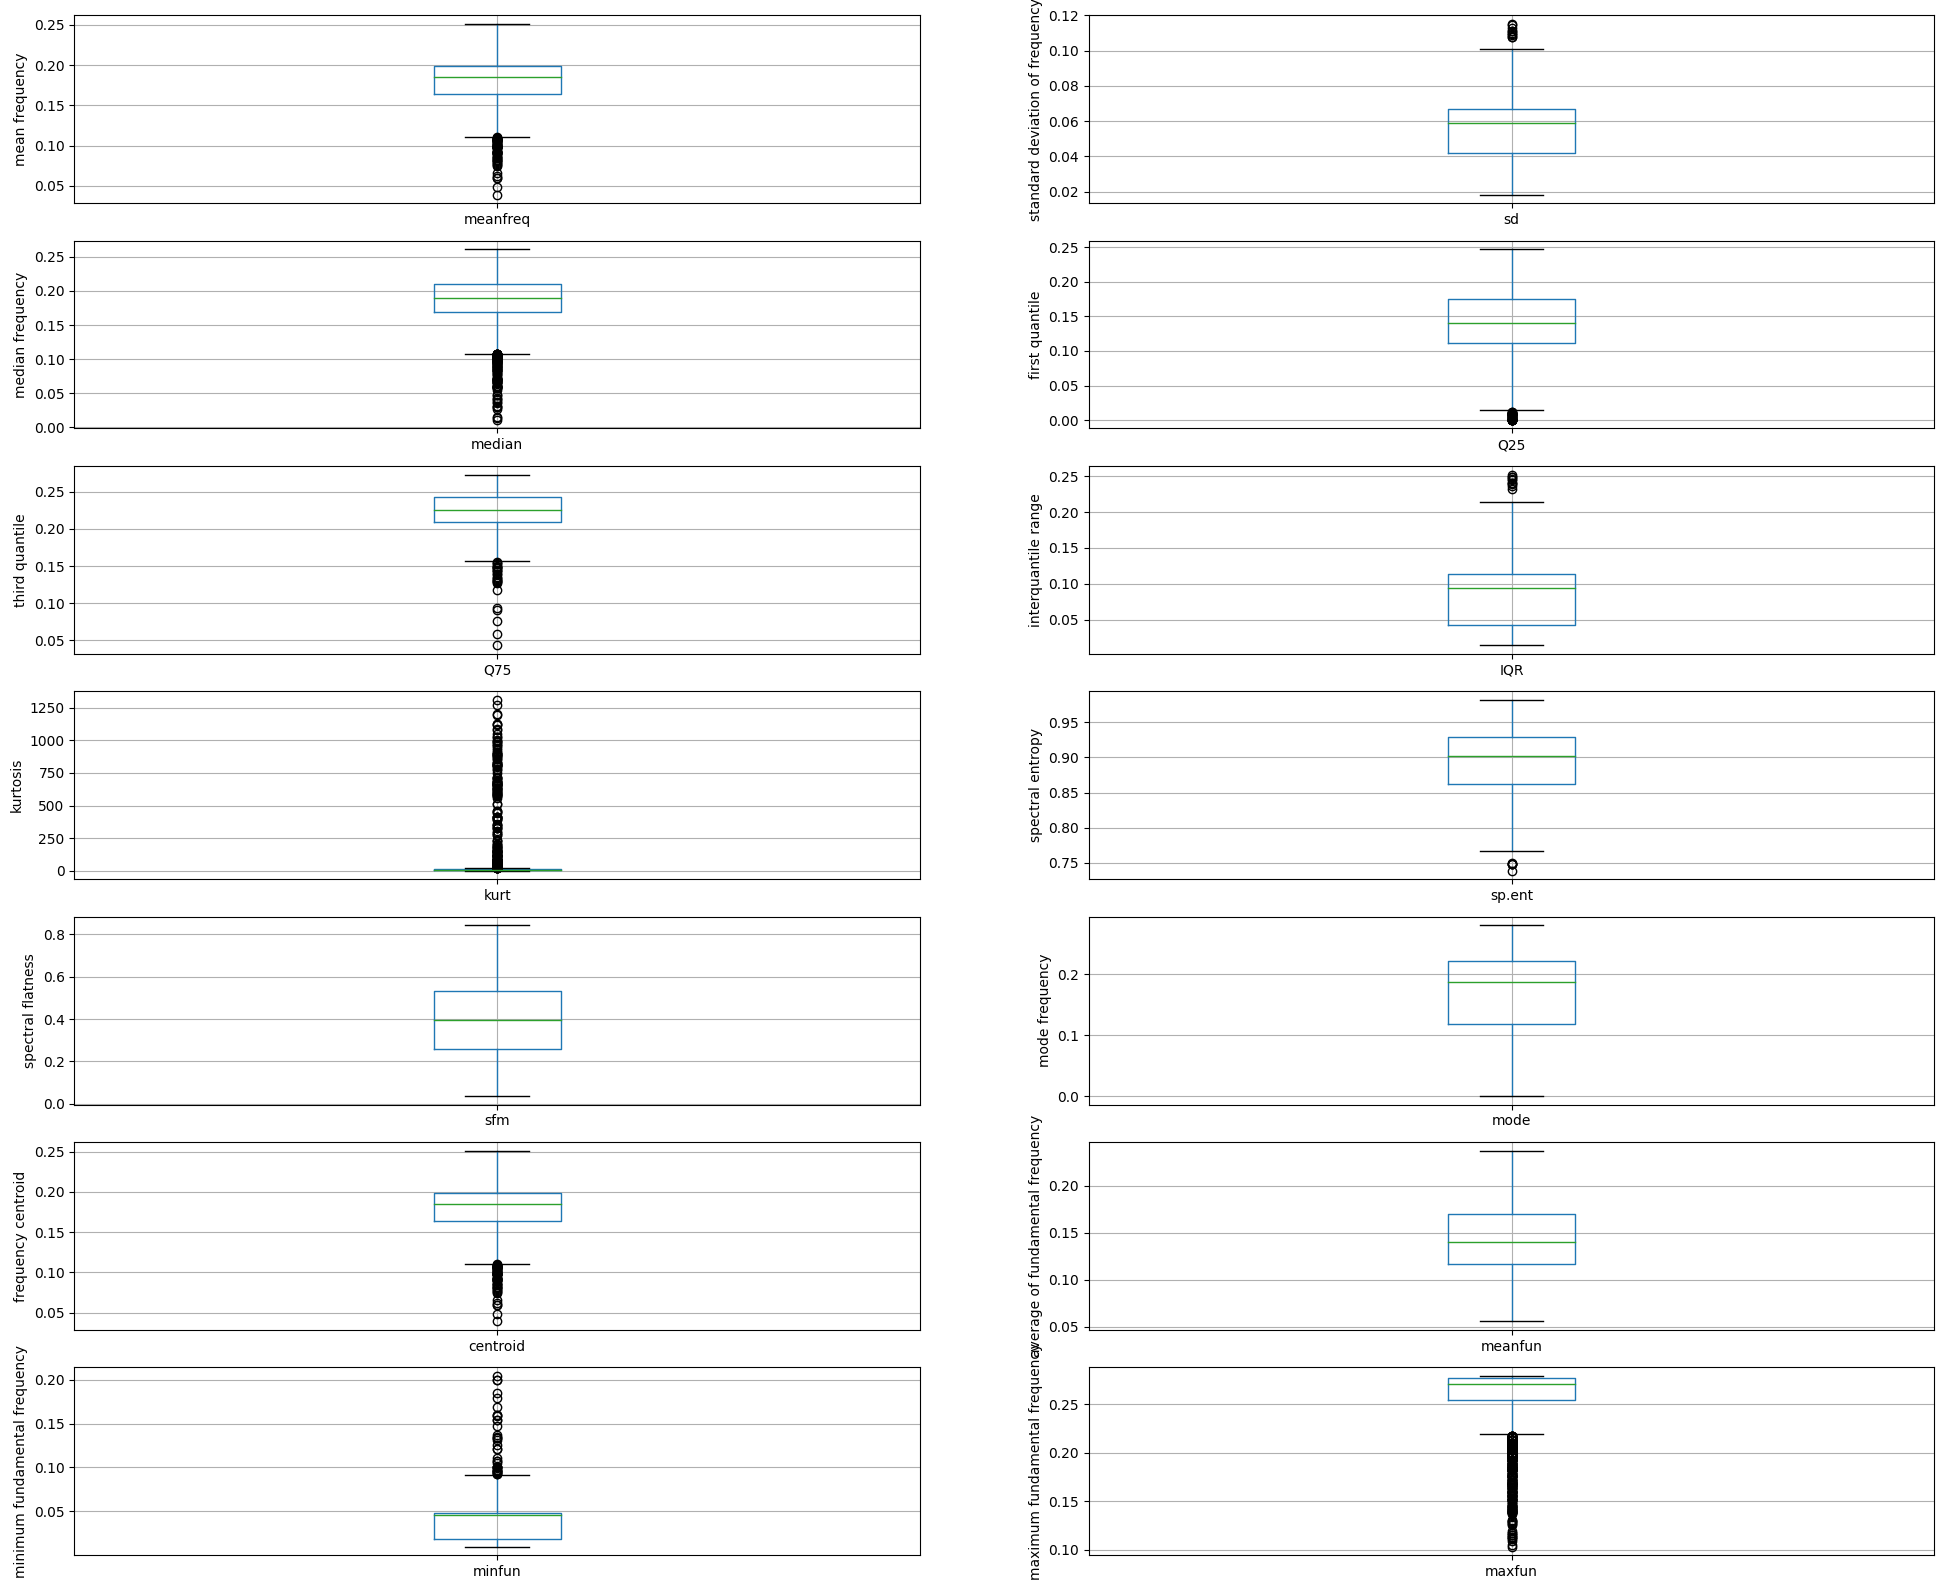

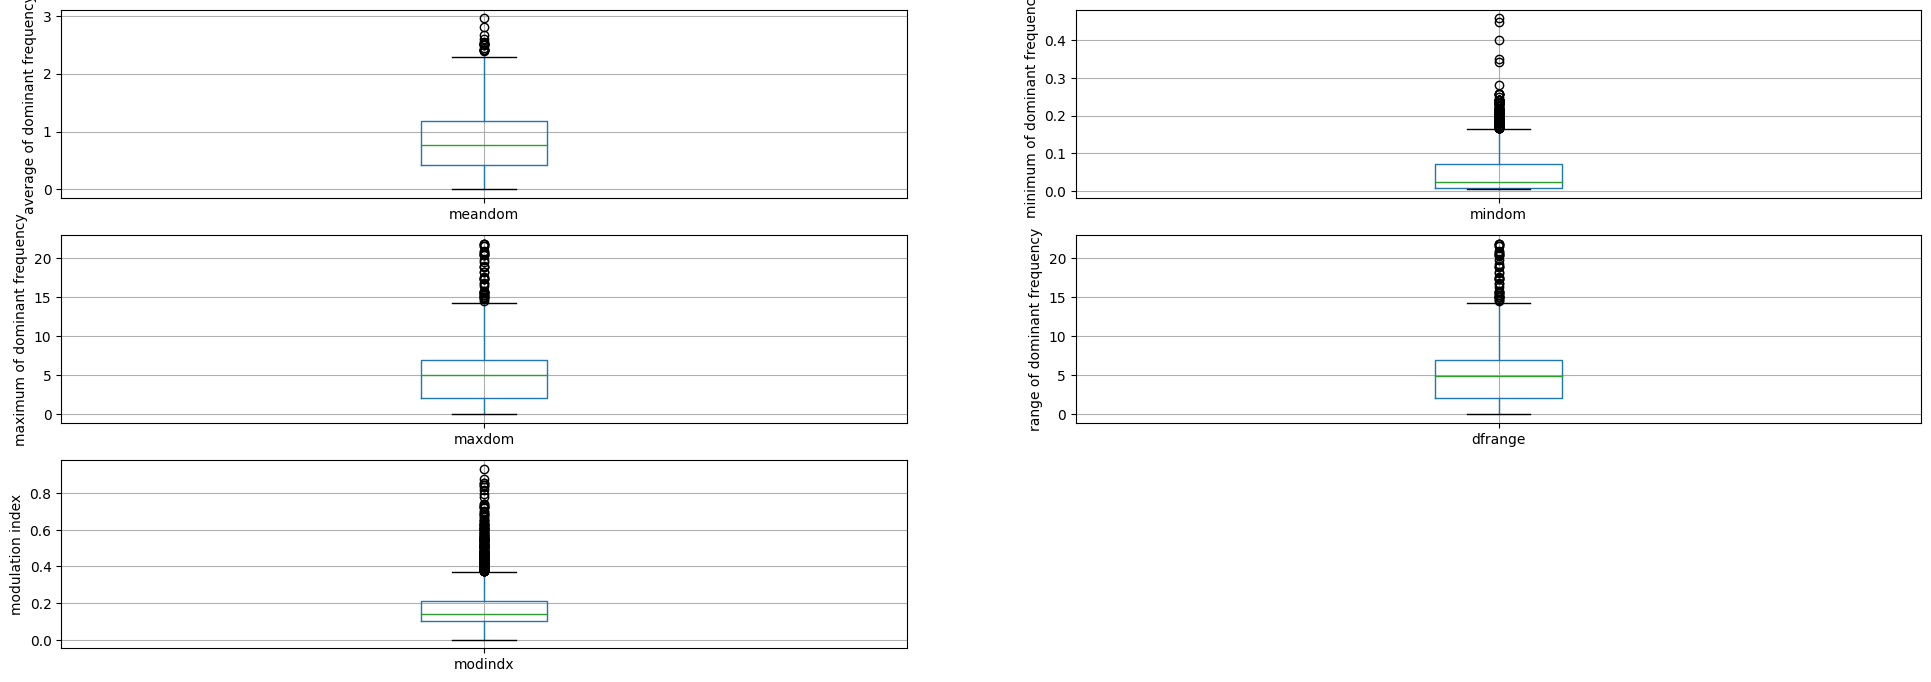

In [10]:
plt.figure(figsize=(24,20))


plt.subplot(7, 2, 1)
fig = df.boxplot(column='meanfreq')
fig.set_title('')
fig.set_ylabel('mean frequency')


plt.subplot(7, 2, 2)
fig = df.boxplot(column='sd')
fig.set_title('')
fig.set_ylabel('standard deviation of frequency')


plt.subplot(7, 2, 3)
fig = df.boxplot(column='median')
fig.set_title('')
fig.set_ylabel('median frequency')


plt.subplot(7, 2, 4)
fig = df.boxplot(column='Q25')
fig.set_title('')
fig.set_ylabel('first quantile')


plt.subplot(7, 2, 5)
fig = df.boxplot(column='Q75')
fig.set_title('')
fig.set_ylabel('third quantile')


plt.subplot(7, 2, 6)
fig = df.boxplot(column='IQR')
fig.set_title('')
fig.set_ylabel('interquantile range')


plt.subplot(7, 2, 7)
fig = df.boxplot(column='kurt')
fig.set_title('')
fig.set_ylabel('kurtosis')

plt.subplot(7, 2, 8)
fig = df.boxplot(column='sp.ent')
fig.set_title('')
fig.set_ylabel('spectral entropy')

plt.subplot(7, 2, 9)
fig = df.boxplot(column='sfm')
fig.set_title('')
fig.set_ylabel('spectral flatness')

plt.subplot(7, 2, 10)
fig = df.boxplot(column='mode')
fig.set_title('')
fig.set_ylabel('mode frequency')

plt.subplot(7, 2, 11)
fig = df.boxplot(column='centroid')
fig.set_title('')
fig.set_ylabel('frequency centroid')

plt.subplot(7, 2, 12)
fig = df.boxplot(column='meanfun')
fig.set_title('')
fig.set_ylabel('average of fundamental frequency')

plt.subplot(7, 2, 13)
fig = df.boxplot(column='minfun')
fig.set_title('')
fig.set_ylabel('minimum fundamental frequency')

plt.subplot(7, 2, 14)
fig = df.boxplot(column='maxfun')
fig.set_title('')
fig.set_ylabel('maximum fundamental frequency')

plt.figure(figsize=(24,20))

plt.subplot(7, 2, 1)
fig = df.boxplot(column='meandom')
fig.set_title('')
fig.set_ylabel('average of dominant frequency')

plt.subplot(7, 2, 2)
fig = df.boxplot(column='mindom')
fig.set_title('')
fig.set_ylabel('minimum of dominant frequency')

plt.subplot(7, 2, 3)
fig = df.boxplot(column='maxdom')
fig.set_title('')
fig.set_ylabel('maximum of dominant frequency')

plt.subplot(7, 2, 4)
fig = df.boxplot(column='dfrange')
fig.set_title('')
fig.set_ylabel('range of dominant frequency')

plt.subplot(7, 2, 5)
fig = df.boxplot(column='modindx')
fig.set_title('')
fig.set_ylabel('modulation index')

## 4. Declare Feature and Dependent Variable

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## 5. Split Dataset Into Training and Test Set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape, X_test.shape

((2534, 20), (634, 20))

## 6. Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[ 1.1733184 , -1.07639646,  0.60643706, ...,  1.36899403,
         1.37733185, -1.10487294],
       [-1.0261755 ,  0.31960418, -1.5865356 , ..., -0.32387353,
        -0.3365899 ,  1.5271315 ],
       [ 0.24410496,  0.3359349 , -0.73302622, ...,  0.50891476,
         0.51720062, -0.17856546],
       ...,
       [-1.57449808,  1.50214356, -1.23234205, ..., -0.34234319,
        -0.33410875, -0.16827451],
       [ 1.90059249, -1.65427054,  1.57488282, ...,  1.30945008,
         1.3177843 , -0.43129411],
       [ 0.19083445, -1.39783694,  0.14542653, ...,  1.18374618,
         1.19207281, -0.32668108]])

In [16]:
X_test

array([[ 0.48416213, -1.16901478,  0.27633325, ...,  0.66108263,
         0.63629571, -0.68150995],
       [-0.05327662,  0.20180805, -0.12292272, ..., -0.15268468,
        -0.14443879, -0.51274936],
       [ 1.37958024, -1.77949917,  0.97760766, ..., -0.27177258,
        -0.31646504, -0.57139851],
       ...,
       [-0.79887615,  1.36229896, -1.07078629, ..., -0.03580211,
        -0.02313823, -0.54910118],
       [ 0.88454249, -1.05617728,  0.55559609, ...,  1.02496232,
         1.03327936, -0.79968485],
       [-0.67716403, -0.20601197, -0.48254078, ..., -1.37140598,
        -1.40348345, -0.09413071]])

We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## 7. Run SVM With Linear kernel

In [17]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=1000.0)

classifier.fit(X_train, y_train)

SVC(C=1000.0, kernel='linear')

## 8. Predicting The Test Set

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array(['female', 'male', 'female', 'female', 'male', 'male', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'male',
       'female', 'female', 'female', 'male', 'male', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'female', 'female',
       'female', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'female',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'female', 'male', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'female', 'male', 'female', 'female',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', '

## 9. Compare Prediction and Test Set side-to-side

In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['female' 'female']
 ['male' 'male']
 ['female' 'female']
 ...
 ['male' 'male']
 ['female' 'female']
 ['female' 'female']]


## 10. Matrix Of Confusion and Accuracy Score

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

In [22]:
print('Confusion matrix\n\n', matrix)

print('\nTrue Positives(TP) = ', matrix[0,0])

print('\nTrue Negatives(TN) = ', matrix[1,1])

print('\nFalse Positives(FP) = ', matrix[0,1])

print('\nFalse Negatives(FN) = ', matrix[1,0])

Confusion matrix

 [[291  10]
 [  5 328]]

True Positives(TP) =  291

True Negatives(TN) =  328

False Positives(FP) =  10

False Negatives(FN) =  5


The confusion matrix shows `291 + 328 = 619 correct predictions` and `5 + 10 = 15 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 291


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 328


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 10 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 5 `(Type II error)`

In [23]:
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(score))

Model accuracy score with linear kernel and C=1000.0 : 0.9763


**Check for Overfitting and Underfitting**

In [24]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9759
Test set score: 0.9763


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.

So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

<Axes: >

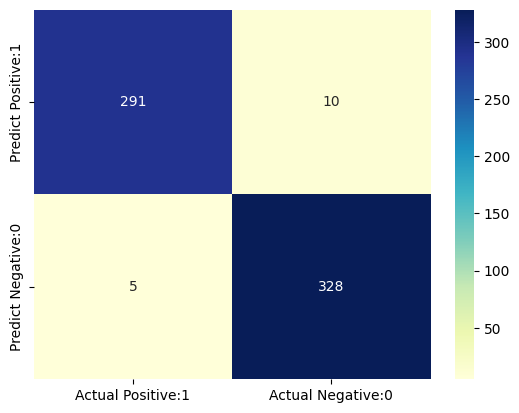

In [25]:
cm_matrix = pd.DataFrame(data=matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [27]:
print(report)

              precision    recall  f1-score   support

      female       0.98      0.97      0.97       301
        male       0.97      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



**Classification Accuracy**

In [28]:
TP = matrix[0,0]
TN = matrix[1,1]
FP = matrix[0,1]
FN = matrix[1,0]

In [29]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9763


**Classification Error**

In [30]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0237


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.

In [31]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9668


## Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, **recall** can be defined as the ratio of `TP to (TP + FN)`.

In [32]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9831


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.

In [33]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9831


### False Positive Rate

In [34]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0296


### Specificity

In [35]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9704


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.

## 11. References
The work done in this project is inspired from following websites:

  1. Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves

  2. https://en.wikipedia.org/wiki/Support-vector_machine

  3. http://dataaspirant.com/2017/01/13/support-vector-machine-algorithm/